# Working with Mosaic Datasets Using R-ArcGIS Bridge

Mosaic datasets are made up of collection of rasters. Mosaic structure efficiently stores and manages multiple rasters for visualization and analysis. Detailed information about mosaic datasets can be found in [ArcGIS reference for mosaic datasets](https://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/what-is-a-mosaic-dataset.htm).

[R-ArcGIS bridge](https://r-arcgis.github.io/) handles mosaic data I/O  using the ```arc.open()``` function. The mosaic dataset opened using ```arc.open``` can be processed on the fly by converting it to a raster object within R using the ```arc.raster``` function. Properties of a mosaic dataset such as ```extent```, ```pixel_type```, ```nrow```, ```ncol``` and mosaicking rules. Mosaicking rules determine how a series of potentially intercepting rasters are displayed as a single raster. Mosaicking rules go beyond only visualization and can be used to stitch together different rasters making up a mosaic. 

Mosaicking rules define how intersections between different rasters within the mosaic dataset are handled and are made up of **method** and **operator**. Simply put, **method** defines which raster will be placed on top of the other for visualization in cases where they overlap and **operator** defines how the intersection between overlapping rasters in the mosaic dataset will be handled. The information on mosaicking rules can be found under [ArcGIS reference for mosaicking rules](https://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/understanding-the-mosaicking-rules-for-a-mosaic-dataset.htm)

## 1. On-the-Fly Analysis with ```arc.raster()```
THe first example will walk you through reading in a mosaic dataset and manipulating it on the fly. For this example, we will be using ```arcgisbinding``` and ```raster``` packages to manipulate and visualize mosaic datasets. 

In [60]:
## Import arcgisbinding library
library(arcgisbinding)
library(raster, quietly = TRUE, warn.conflicts = FALSE)

In [61]:
## Make sure that the bridge is connected to a valid installation of ArcGIS Pro (or Desktop)
## Use arc.check_product()
## Use message function for better notebook display
## Note: You do not need to have the message function on a R terminal
message(arc.check_product())

Advanced12.3.0.13568C:\ArcGIS\Pro\rarcproxy_proArcGIS Pro1.0.1.231


In [62]:
## Open the mosaic dataset
mosaic.open.obj <- arc.open('datasets/mosaics/Mosaics.gdb/Local_T_Model')
## Display the arc.open object
mosaic.open.obj

dataset_type    : MosaicDataset
path            : datasets/mosaics/Mosaics.gdb/Local_T_Model 
format          : AMD
pixel_type      : F32 (32bit)
compression_type: None
nrow            : 252
ncol            : 613
extent          : xmin=-124.3786, ymin=25.83376, xmax=-67.81589, ymax=49.0863
WKT             : GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984"...
WKID            : 4326
raster_function : Mosaic Function (Performs on-the-fly mosaic on a raster catalog.)
bands           : 1
       ncol nrow       min      max     mean  stddev
Band_1  613  252 -2.152459 22.25084 10.44301 4.93543
mosaic          : method=NorthWest, operator=Blend, Ascending=TRUE 
fields          : OBJECTID, Shape, Name, MinPS, MaxPS, LowPS, HighPS, Category, 
fields          : Tag, GroupName, ProductName, CenterX, CenterY, ZOrder, 
fields          : TypeID, ItemTS, UriHash, Uri, Shape_Length, Shape_Area

```arc.open``` provides information pertaining to the mosaic dataset as it exists in the geodatabase.

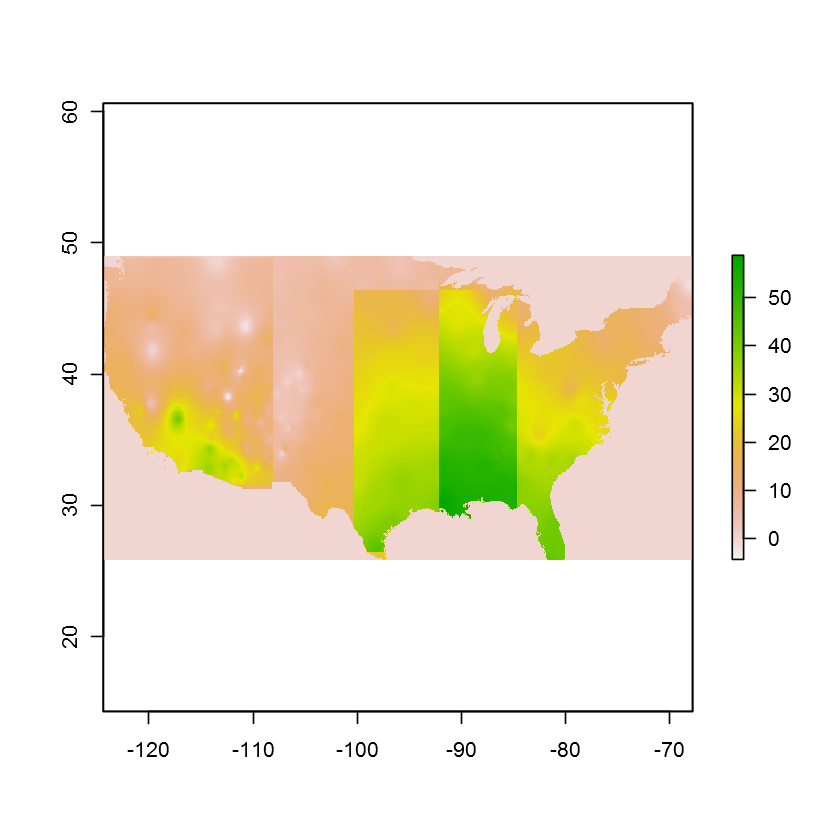

In [63]:
mosaic.obj.original <- arc.raster(mosaic.open.obj, mosaic = list(method = "NorthWest", operator = "Sum"))
## Plot the resulting mosaic dataset
plot(as.raster(mosaic.obj.original))

The resulting raster for the mosaic object above is given below:

In [70]:
mosaic.obj.original

type            : Raster
pixel_type      : F32 (32bit)
nrow            : 252
ncol            : 613
cellsize        : 0.0922719999999999, 0.0922719999999999
nodata          : NA
extent          : xmin=-124.3786, ymin=25.83376, xmax=-67.81589, ymax=49.0863
raster_function : Mosaic Function (Performs on-the-fly mosaic on a raster catalog.)
mosaic          : method=NorthWest, operator=Sum, Ascending=TRUE
WKT             : GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984"...
WKID            : 4326 
band            : Band_1

Mosaic data displayed above is the instance of the dataset as it exists in the file geodatabase in terms of sorting and the way overlaps are resolved. ```arc.raster``` creates a raster object that allows modifying the mosaic dataset on the fly. For this example case, we will blend all of the rasters making up the dataset. For this purpose we will use the **Blend** operator with the **Seamline** method, to blend rasters where they overlap. 

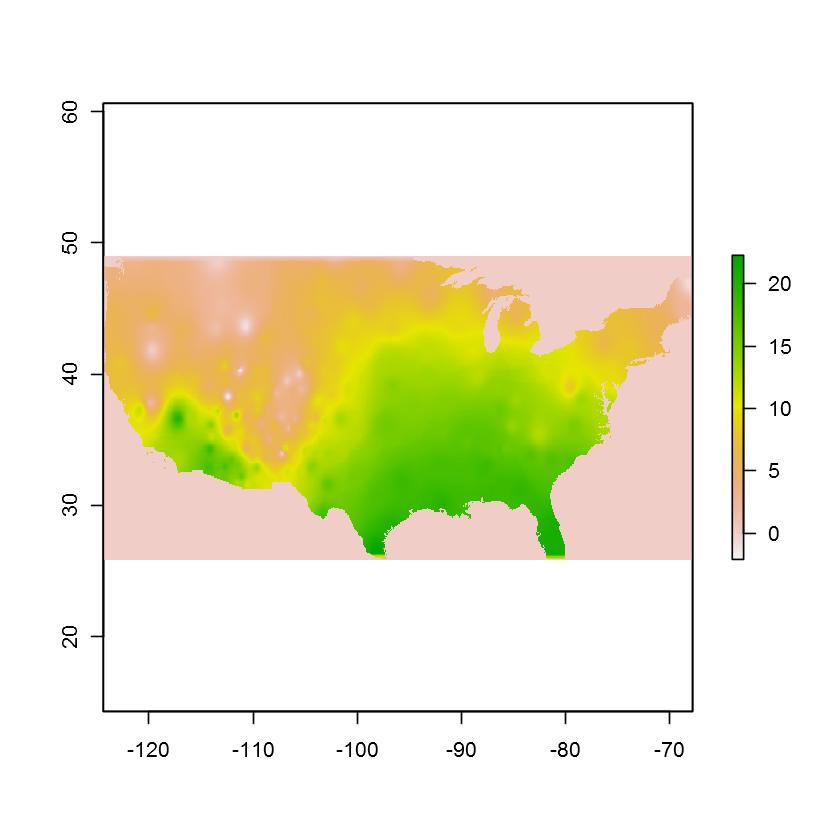

In [71]:
# Blend Rasters Using the Blend operator on seamlines
mosaic.obj.blended <- arc.raster(mosaic.open.obj, mosaic = list(method = "Seamline", operator = "Blend"))
## Plot the resulting mosaic dataset
plot(as.raster(mosaic.obj.blended))

Figure above shows the resulting mosaic dataset that is modified on-the-fly using the ```arc.raster``` function. Note that ```arc.raster``` operates directly on the ```arc.open``` object to modify the mosaic data on-the-fly without reopening the mosaic dataset. Note that the operator and the method defined within ```arc.raster``` function defines the new raster created as a result of combining multiple overlapping rasters.

Functionality for ```arc.raster``` object such as subsetting, coarsening/refining (resampling) and reprojecting is also available for mosaic datasets.

Firstly, we will resample the resulting mosaic dataset above to a 50-by-60 raster. We do by ```nrow``` and ```ncol```.

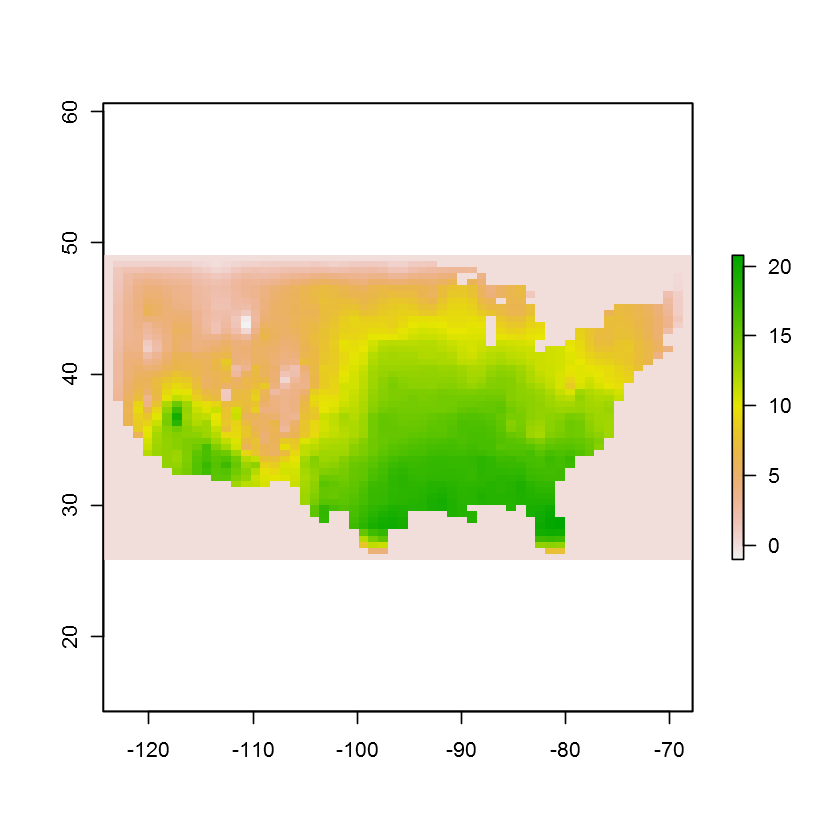

In [65]:
mosaic.obj.coarse <- arc.raster(mosaic.open.obj, mosaic = list(method = "Seamline", operator = "Blend"), nrow = 50, ncol = 60)
## Plot the resulting mosaic dataset
plot(as.raster(mosaic.obj))

```mosaic.obj.coarse``` is a coarse version of mosaic.obj.blended defined with respect to ```nrow``` and ```ncol``` variables.

In [68]:
mosaic.obj.coarse

type            : Raster
pixel_type      : F32 (32bit)
nrow            : 50
ncol            : 60
resample_type   : NearestNeighbor
cellsize        : 0.942712266666666, 0.46505088
nodata          : NA
extent          : xmin=-124.3786, ymin=25.83376, xmax=-67.81589, ymax=49.0863
raster_function : Mosaic Function (Performs on-the-fly mosaic on a raster catalog.)
mosaic          : method=NorthWest, operator=Blend, Ascending=TRUE
WKT             : GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984"...
WKID            : 4326 
band            : Band_1

Note that after the on-the-fly analysis all rasters making up the mosaic are blended to one final raster and the ```type``` for ```mosaic.obj.coarse``` is now ```Raster```.

## 2. Save Resulting Mosaic

You can save ```arc``` objects different ways. In this subsection, we will explore saving rasters differently with respect to your data size restrictions.


After performing on-the-fly operations on mosaics you can save the resulting mosaic using the ```arc.write()```. Processed mosaic dataset, ```mosaic.obj.coarse``` can be saved as follows:

In [72]:
arc.write('datasets/mosaics/Mosaics.gdb/coarseAirTemp', mosaic.obj.coarse)

## 3. Working with Time-Series Mosaics

Note that the saved mosaic is converted to a raster structure after operators are run and within the R-ArcGIS Bridge framework one-the-fly mosaic operators yield rasters. Time-series mosaics are used to store and analyze time-referenced rasters. Unike a generic mosaic dataset time-series mosaics generally contain time-referenced rasters that fully overlap in space. ```arc.open()``` can also handle this type on input. 

In [58]:
open_obj_t_raster <- arc.open('datasets/mosaics/Mosaics.gdb/airTemperature')
air.temp.jan <- arc.raster(open_obj_t_raster, mosaic = list(method = "LockRaster", LockRasterID = 1, operator = 'Sum'))

```list(method = "LockRaster", LockRasterID = 1, operator = 'Sum')``` ensures that you reach 1st time slice raster residing in the time-series mosaic. This method enables you to take advantage of the time-series mosaic using a non-destructive operator that queries a given raster time slice. Note that using this pattern you need to know which raster ID corresponds to which time slice.